<a href="https://colab.research.google.com/github/Anees31-AI/Supervised_Learning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error


**Loading Data**

In [2]:
#Load california dataset
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Price']=data.target
df.head()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Split Data(Training vs Test)**

In [3]:
X=df.drop('Price',axis=1)
y=df['Price']

#Split: 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

**Train a Model**

In [4]:
model=RandomForestRegressor(n_estimators=200,max_depth=None,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

**Make Predictions**

In [5]:
y_pred=model.predict(X_test)

**Evaluate the model**

In [6]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared error:{mse:.2f}")

Mean Squared error:0.30


**Calculating RMSE**

In [7]:
mse=0.52
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.7211102550927979


**Actual vs Predicted Plot**

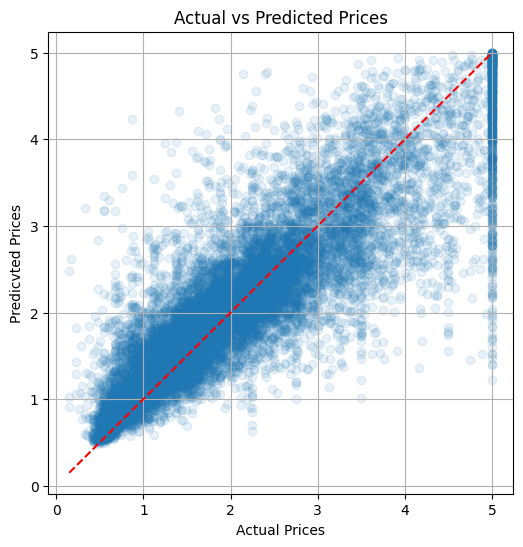

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.1)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()],'r--') #Perfect Line
plt.xlabel('Actual Prices')
plt.ylabel('Predicvted Prices')
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

**Residual Plot**

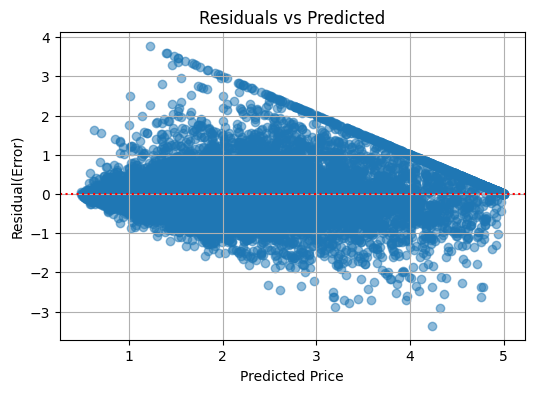

In [9]:
residuals=y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred,residuals,alpha=0.5)
plt.axhline(0,color='red',linestyle='dotted')
plt.xlabel('Predicted Price')
plt.ylabel('Residual(Error)')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.show()

**Distribution of Errors(Histogram)**

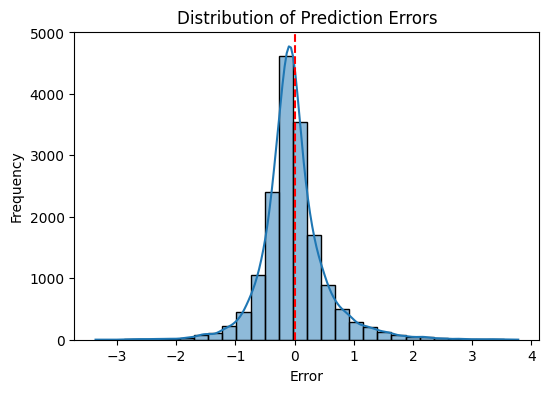

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(residuals,kde=True,bins=30)
plt.axvline(0,color='red',linestyle='--')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

**Actual vs Predicted**

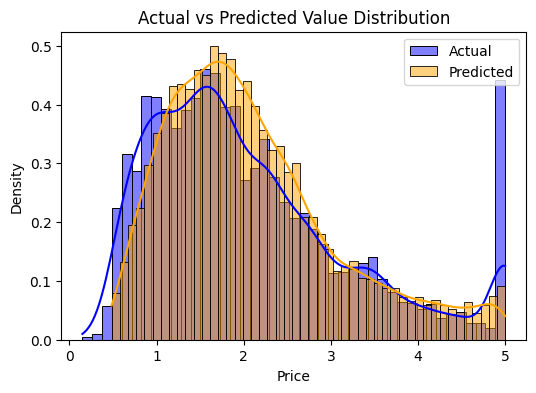

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(y_test,color='blue',label='Actual',kde=True,stat='density')
sns.histplot(y_pred,color='orange',label='Predicted',kde=True,stat="density")
plt.title('Actual vs Predicted Value Distribution')
plt.xlabel('Price')
plt.legend()
plt.show()

**Printing predicting values**

In [12]:
print(np.unique(y_pred,return_counts=True))

(array([0.485315  , 0.490465  , 0.49503   , ..., 4.99867995, 4.99965995,
       5.00001   ]), array([1, 1, 1, ..., 1, 1, 4]))
